In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_file = "../Airbnb_Austin_Data_Finalized.csv"
abb_csv = pd.read_csv(csv_file)
abb_df = pd.DataFrame(abb_csv)
abb_df.head()


,summary,zipcode,property_type,accommodates,bedrooms,bathrooms,beds,amenities,square_feet,price,availability_365,cancellation_policy,review_scores_rating,review_scores_value,description,instant_bookable,host_verifications
0,Conveniently located 10-15 from downtown in SW...,78749.0,House,6,1.0,2.5,3.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",3600.0,300.0,240,moderate,100.0,10.0,Conveniently located 10-15 from downtown in SW...,f,"['email', 'facebook', 'linkedin', 'reviews']"
1,Rent this cool concept trailer that has everyt...,78739.0,Camper/RV,2,1.0,0.0,1.0,"{""Air Conditioning"",Heating,""Family/Kid Friend...",NaN,99.0,364,moderate,NaN,NaN,Rent this cool concept trailer that has everyt...,f,"['email', 'phone', 'google', 'kba']"
2,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
3,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
4,Brand-new 3BR/2BA Austin home with landscaped ...,78739.0,House,6,3.0,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,599.0,358,strict,NaN,NaN,Brand-new 3BR/2BA Austin home with landscaped ...,f,"['email', 'phone', 'linkedin', 'reviews', 'jum..."


In [3]:
price_per_accomm = abb_df["price"]/abb_df["accommodates"]

abb_df["price_per_accommodation"] = price_per_accomm
abb_df["price_per_accommodation"].median()


47.5

In [4]:
accommodation_group = abb_df.groupby("accommodates")
accomm_group_median = accommodation_group.median()
accomm_group_median 

,zipcode,bedrooms,bathrooms,beds,square_feet,price,availability_365,review_scores_rating,review_scores_value,price_per_accommodation
accommodates,,,,,,,,,,
1,78729.0,1.0,1.00,1.0,275.0,55.0,339.0,96.0,10.0,55.000000
2,78722.0,1.0,1.00,1.0,600.0,95.0,336.0,98.0,10.0,47.500000
3,78704.0,1.0,1.00,1.0,600.0,125.0,318.0,97.0,10.0,41.666667
4,78704.0,1.0,1.00,2.0,1000.0,180.0,328.0,98.0,10.0,45.000000
5,78704.0,2.0,1.00,2.0,960.0,220.0,316.0,98.0,10.0,44.000000
6,78704.0,2.0,2.00,3.0,1425.0,299.0,335.0,99.0,10.0,49.833333
7,78721.0,3.0,2.00,3.5,1500.0,350.0,338.5,99.5,10.0,50.000000
8,78704.0,3.0,2.00,4.0,1768.5,450.0,343.0,98.0,10.0,56.250000
9,78722.0,3.0,2.00,5.0,2200.0,399.0,346.0,98.0,10.0,44.333333


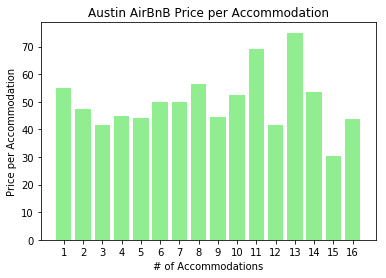

In [30]:
y_axis = accomm_group_median["price_per_accommodation"]
#x_axis = range(len(accomm_group_median["price_per_accommodation"]))
x_axis = range(1,17)
plt.title("Austin AirBnB Price per Accommodation")
plt.xlabel("# of Accommodations")
plt.ylabel("Price per Accommodation")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations)
#x_axis = range(len(abb_df["price_per_accommodation"]))
#x_axis = abb_df["price"]
#plt.scatter(x_axis, y_axis, marker="o", facecolors="red", 
#            s=0.1, alpha=0.75)
plt.bar(x_axis, y_axis, color="lightgreen", align="center")
plt.savefig("AustinPriceVsAccomm.png")